In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\Regression\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.columns)
print(df.dtypes)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [4]:
# Check the data structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [5]:
# Step 1: Data Preprocessing (Check for missing values)
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Step 2: Selecting one feature to predict 'Outcome'
# Here we select 'BMI' to predict 'Outcome'
X = df[['BMI']].values  # Independent variable (using double brackets to get a 2D array for sklearn)
y = df['Outcome'].values  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Step 3: Regression Results
# Calculate the coefficient and intercept
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_test - y_pred) ** 2)
print("Residual Sum of Squares (RSS):", rss)

# Calculate the Coefficient of Determination (R-squared)
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r_squared)

Coefficient: 0.018852486014366114
Intercept: -0.25606083037934685
Residual Sum of Squares (RSS): 33.54189582110756
Coefficient of Determination (R-squared): 0.05134032021109902


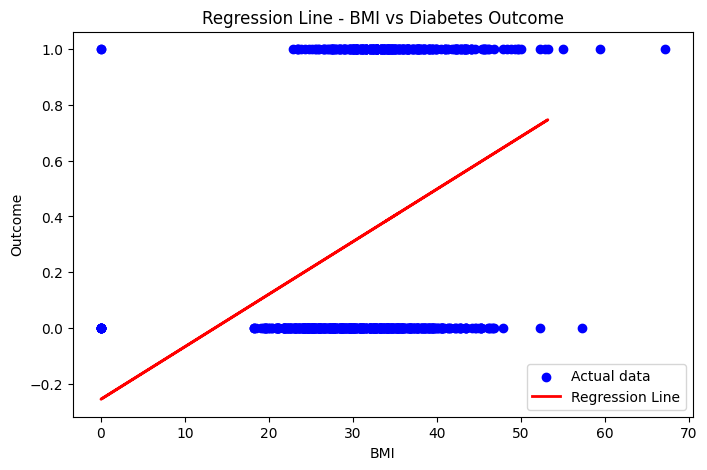

In [9]:

# Step 4: Plotting the Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.title('Regression Line - BMI vs Diabetes Outcome')
plt.legend()
plt.show()